## Observations and Insights 

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [142]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].count()
print(mouse_count)
print(len(merge_df["Mouse ID"].unique()))

1893
249


In [143]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merge_df.duplicated(subset=["Mouse ID", "Timepoint"])
duplicated_data


##Come back to this

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [144]:
merge_with_dup_df = merge_df
merge_with_dup_df["Is duplicate?"] = duplicated_data
merge_with_dup_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [145]:
merge_with_dup_df.loc[merge_with_dup_df["Is duplicate?"] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [146]:
merge_with_dup_df.loc[merge_with_dup_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [147]:
# Optional: Get all the data for the duplicate mouse ID. 


##Come back to this

In [148]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [149]:
clean_df.loc[clean_df["Is duplicate?"] == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?


In [150]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = clean_df["Mouse ID"].count()
print(cleaned_mouse_count)
print(len(clean_df["Mouse ID"].unique()))

1888
249


In [151]:
clean_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Is duplicate?'],
      dtype='object')

## Summary Statistics

In [152]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group_df = clean_df.groupby("Drug Regimen") 
regimen_summary_df = pd.DataFrame()
regimen_summary_df["Mean"] = regimen_group_df["Tumor Volume (mm3)"].mean()
regimen_summary_df["median"] = regimen_group_df["Tumor Volume (mm3)"].median()
regimen_summary_df["Variance"] = regimen_group_df["Tumor Volume (mm3)"].var()
regimen_summary_df["Std"] = regimen_group_df["Tumor Volume (mm3)"].std()
regimen_summary_df["SEM"] = regimen_group_df["Tumor Volume (mm3)"].sem()
regimen_summary_df

,Mean,median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [153]:
regimen_group_df["Tumor Volume (mm3)"].max()

Drug Regimen
Capomulin    48.158209
Ceftamin     68.923185
Infubinol    72.226731
Ketapril     78.567014
Naftisol     76.668817
Placebo      73.212939
Propriva     72.455421
Ramicane     47.622816
Stelasyn     75.123690
Zoniferol    73.324432
Name: Tumor Volume (mm3), dtype: float64

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_sum = regimen_group_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [155]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = regimen_group_df["Drug Regimen"].count()
regimen_count


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

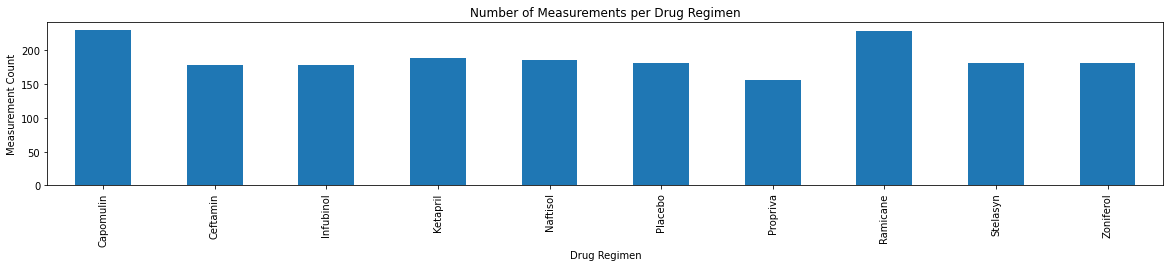

<Figure size 432x288 with 0 Axes>

In [156]:
regimen_count.plot(kind="bar", figsize=(20,3))
plt.title("Number of Measurements per Drug Regimen")
plt.ylabel("Measurement Count")
plt.show()
plt.tight_layout()

In [157]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn",
         "Zoniferol"]
drug_count = regimen_count

Text(149.875, 0.5, 'Measurement Count')

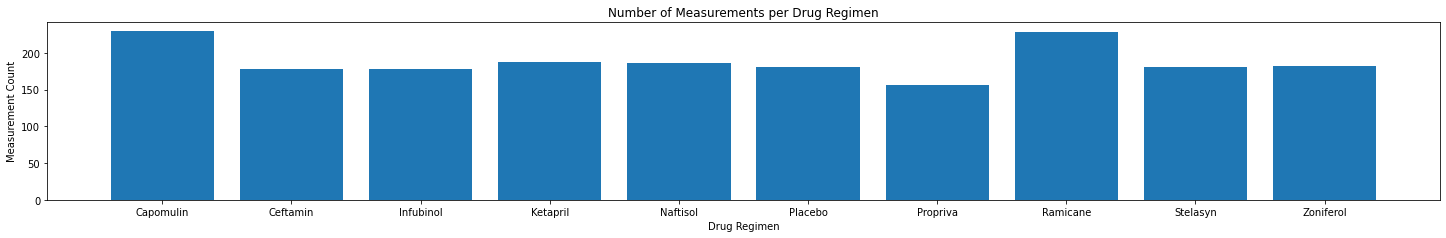

In [158]:
plt.figure(figsize=(20, 3))
plt.bar(drugs, drug_count, align="center")
plt.tight_layout()

plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")

In [159]:
#df_of_gender = clean_df[["Mouse ID", "Sex"]]
#count_of_gender = df_of_gender.drop_duplicates(subset="Mouse ID")
#gender_count = count_of_gender["Sex"].value_counts()

Text(0.5, 1.0, 'Distribution of Males vs Females')

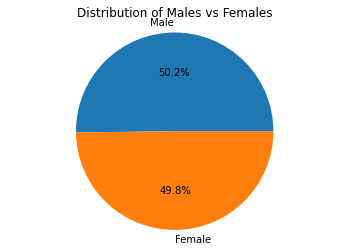

In [160]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_of_gender = clean_df[["Mouse ID", "Sex"]]
count_of_gender = df_of_gender.drop_duplicates(subset="Mouse ID")
gender_count = count_of_gender["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("")
plt.title("Distribution of Males vs Females")


In [161]:
gender_count

Male      125
Female    124
Name: Sex, dtype: int64

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
gender_number = [gender_count]
explode = (0,0)


<ipython-input-163-1379ecd13e12>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_number, explode=explode, labels=gender,


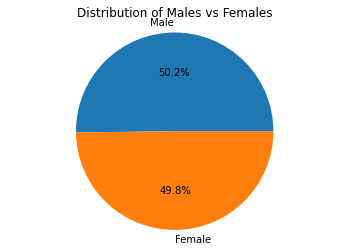

In [163]:
plt.pie(gender_number, explode=explode, labels=gender,
        autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Males vs Females")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [164]:
##Printing out largest(last) timepoint by mouse
mouse_grouped = clean_df.groupby("Mouse ID")
last_timepoint = mouse_grouped["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
last_timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [165]:
##Merging the last timepoint column into the original data 
timepoint_merge = pd.merge(clean_df, last_timepoint_df, on="Mouse ID", how="outer")
timepoint_merge = timepoint_merge.rename(columns={"Timepoint_x" : "Timepoint", "Timepoint_y" : "Last Timepoint"})
timepoint_merge

##Maybe change how it merges to get the tumor value at the last timepoint - either change "on" to timepoint or the how

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,False,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,False,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,False,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,False,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,False,45
...,...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,False,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,False,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,False,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,False,45


In [166]:
##Brute force - not ideal
##combining the data with the desired drugs into once dataframe 
regimen_trim = timepoint_merge[timepoint_merge["Drug Regimen"] == "Capomulin"]
regimen_trim2 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Ramicane"]
regimen_trim3 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Infubinol"]
regimen_trim4 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Ceftamine"]

In [167]:
regimen_trim = regimen_trim2.append(regimen_trim)
regimen_trim = regimen_trim3.append(regimen_trim)
regimen_trim = regimen_trim4.append(regimen_trim)

In [168]:
regimen_trim

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
454,a203,Infubinol,Female,20,23,0,45.000000,0,False,45
455,a203,Infubinol,Female,20,23,5,48.508468,0,False,45
456,a203,Infubinol,Female,20,23,10,51.852437,1,False,45
457,a203,Infubinol,Female,20,23,15,52.777870,1,False,45
458,a203,Infubinol,Female,20,23,20,55.173336,1,False,45
...,...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,False,45
1447,r157,Capomulin,Male,22,25,0,45.000000,0,False,15
1448,r157,Capomulin,Male,22,25,5,45.597064,0,False,15
1449,r157,Capomulin,Male,22,25,10,46.059608,0,False,15


In [169]:
##Dropping "duplicate" i.e. earlier timepoints by mouse and keeping the last (should be the largest)
drop_timepoint = regimen_trim.drop_duplicates("Mouse ID", keep="last")
drop_timepoint
##The tumor value should be the final tumor value 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
463,a203,Infubinol,Female,20,23,45,67.973419,2,False,45
473,a251,Infubinol,Female,21,25,45,65.525743,1,False,45
530,a577,Infubinol,Female,6,25,30,57.031862,2,False,30
540,a685,Infubinol,Male,8,30,45,66.083066,3,False,45
637,c139,Infubinol,Male,11,28,45,72.226731,2,False,45
...,...,...,...,...,...,...,...,...,...,...
370,s710,Capomulin,Female,1,23,45,40.728578,1,False,45
380,l509,Capomulin,Male,17,21,45,41.483008,3,False,45
390,r944,Capomulin,Male,12,25,45,41.581521,2,False,45
440,i557,Capomulin,Female,1,24,45,47.685963,1,False,45


In [ ]:
##Boolean test results are odd, even though the data seems to work. Should expect all true values 
#duplicated_time_point = drop_timepoint.duplicated(subset=["Timepoint", "Last Timepoint"])
#duplicated_time_point

In [ ]:
#drop_timepoint["Is last timepoint?"] = duplicated_time_point

In [ ]:
#drop_timepoint.loc[drop_timepoint["Is last timepoint?"] == False]

In [ ]:
##Brute force - not ideal - combining the data with the desired drugs into once dataframe 
#regimen_trim = drop_timepoint[drop_timepoint["Drug Regimen"] == "Capomulin"]
#regimen_trim2 = drop_timepoint[drop_timepoint["Drug Regimen"] == "Ramicane"]
#regimen_trim3 = drop_timepoint[drop_timepoint["Drug Regimen"] == "Infubinol"]
#regimen_trim4 = drop_timepoint[drop_timepoint["Drug Regimen"] == "Ceftamine"]

In [ ]:
#regimen_trim = regimen_trim2.append(regimen_trim)
#regimen_trim = regimen_trim3.append(regimen_trim)
#regimen_trim = regimen_trim4.append(regimen_trim)

In [ ]:
#regimen_trim

In [170]:
regimen_trim["Final Tumor Volume (mm3)"] = drop_timepoint["Tumor Volume (mm3)"]

In [171]:
regimen_trim

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint,Final Tumor Volume (mm3)
454,a203,Infubinol,Female,20,23,0,45.000000,0,False,45,NaN
455,a203,Infubinol,Female,20,23,5,48.508468,0,False,45,NaN
456,a203,Infubinol,Female,20,23,10,51.852437,1,False,45,NaN
457,a203,Infubinol,Female,20,23,15,52.777870,1,False,45,NaN
458,a203,Infubinol,Female,20,23,20,55.173336,1,False,45,NaN
...,...,...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,False,45,47.685963
1447,r157,Capomulin,Male,22,25,0,45.000000,0,False,15,NaN
1448,r157,Capomulin,Male,22,25,5,45.597064,0,False,15,NaN
1449,r157,Capomulin,Male,22,25,10,46.059608,0,False,15,NaN


In [ ]:
##Run a boolean test to make sure the timepoints that remain actually match last timepoint,
##similar to duplicates test above

In [ ]:
for i in range(len(drop_timepoint)): 
  print(drop_timepoint.loc[i, "Timepoint"], drop_timepoint.loc[i, "Tumor Volume (mm3)"]) 

##DOES NOT WORK

In [ ]:
if timepoint_merge.iloc[timepoint_merge[:, "Timepoint"] == timepoint_merge[:, "Last Timepoint"]]:
    print(timepoint_merge.iloc[:, "Tumor Volume (mm3)"])
##DOES NOT WORK

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
